In [1]:
import cv2
import math
import argparse
import collections                                         
collections_abc = getattr(collections, 'abc', collections)

In [11]:
# Function to extract frames 
def FrameCapture(path): 

    cap = cv2.VideoCapture(path) 

    count = 0
    success = 1                                                                        # checks whether frames were extracted 
    
    frames_dest_folder = "C:/Users/DMC/Desktop/frames_dest_folder/"                    # see / is used not \ 
    
    while(cap.isOpened()):
        success, image = cap.read() 
          
        if (success):          # and count <= 500   # 500 is here frame count limit, when needed it can be removed
            # img2 = cv2.resize(image, (640, 480))
            cv2.imwrite(frames_dest_folder + "frame%d.jpg" % count, image)              # Saves the frames with frame-count
            count+=1
            
        else:
            break
            
    cap.release()

In [12]:
# Calling the FrameCapture function 
video_path = "C:/Users/DMC/Desktop/sample_video/10.mp4"
FrameCapture(video_path) 

In [5]:
def highlightFace(net, frame, conf_threshold=0.7):
    frameOpencvDnn=frame.copy()
    frameHeight=frameOpencvDnn.shape[0]
    frameWidth=frameOpencvDnn.shape[1]
    blob=cv2.dnn.blobFromImage(frameOpencvDnn, 1.0, (300, 300), [104, 117, 123], True, False)

    net.setInput(blob)
    detections=net.forward()
    faceBoxes=[]
    for i in range(detections.shape[2]):
        confidence=detections[0,0,i,2]
        if confidence>conf_threshold:
            x1=int(detections[0,0,i,3]*frameWidth)
            y1=int(detections[0,0,i,4]*frameHeight)
            x2=int(detections[0,0,i,5]*frameWidth)
            y2=int(detections[0,0,i,6]*frameHeight)
            faceBoxes.append([x1,y1,x2,y2])
            cv2.rectangle(frameOpencvDnn, (x1,y1), (x2,y2), (0,255,0), int(round(frameHeight/150)), 8)
    return frameOpencvDnn,faceBoxes


In [6]:

faceProto="opencv_face_detector.pbtxt"
faceModel="opencv_face_detector_uint8.pb"
ageProto="age_deploy.prototxt"
ageModel="age_net.caffemodel"
genderProto="gender_deploy.prototxt"
genderModel="gender_net.caffemodel"

MODEL_MEAN_VALUES=(78.4263377603, 87.7689143744, 114.895847746)
ageList=['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
genderList=['Male','Female']

In [7]:

genderNet=cv2.dnn.readNet(genderModel,genderProto)
faceNet=cv2.dnn.readNet(faceModel,faceProto)
ageNet=cv2.dnn.readNet(ageModel,ageProto)


In [8]:
import matplotlib.pyplot as plt

18
No face detected


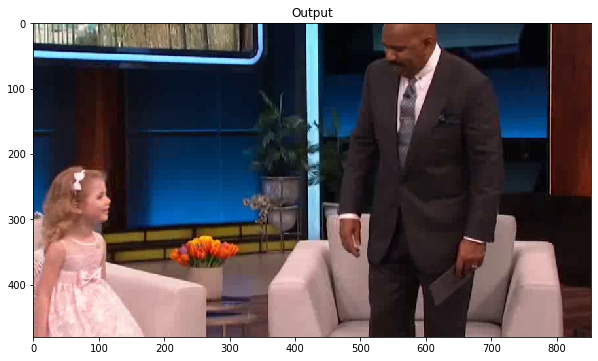

40


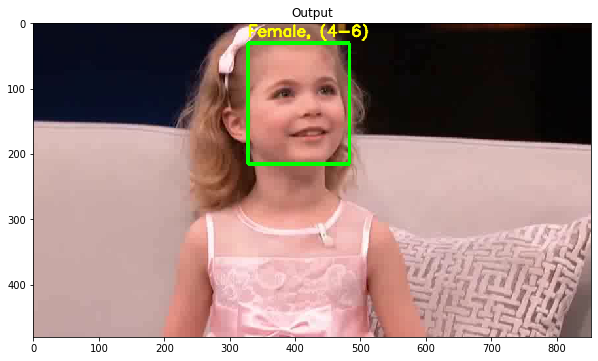

173


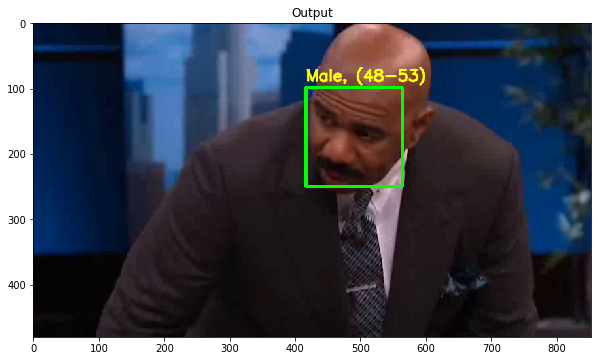

217
No face detected


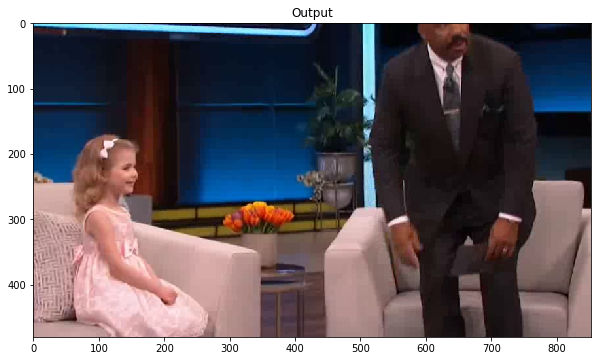

236


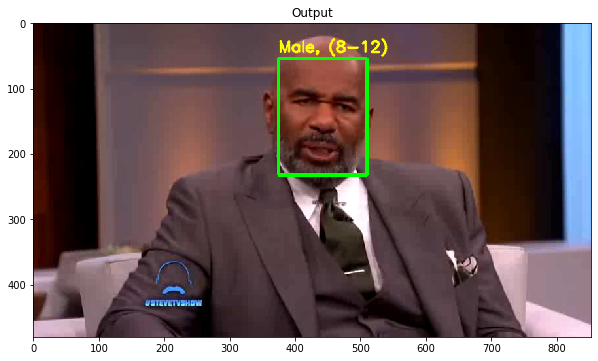

283


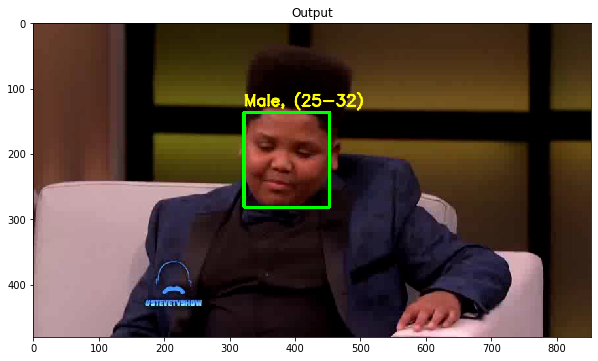

333


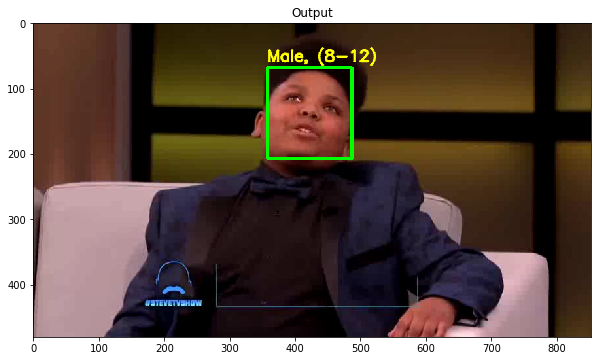

485


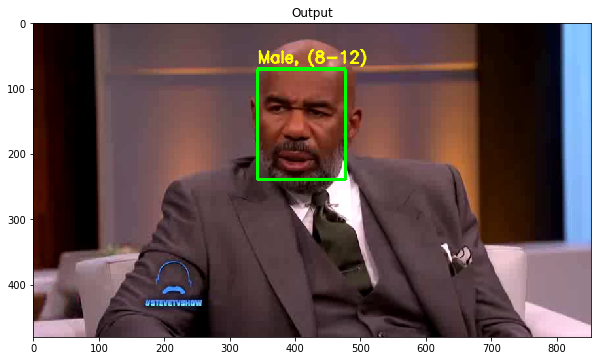

570
No face detected


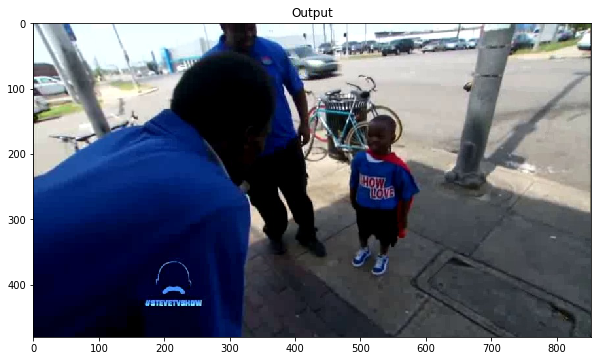

583


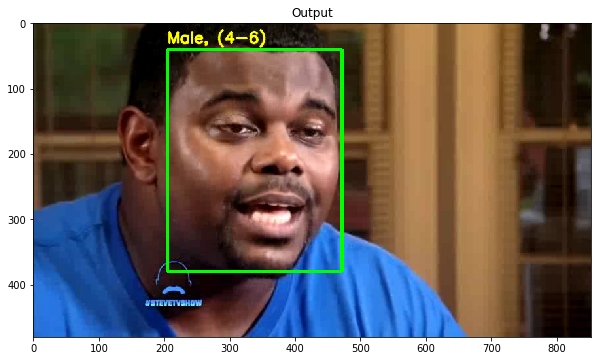

654
No face detected


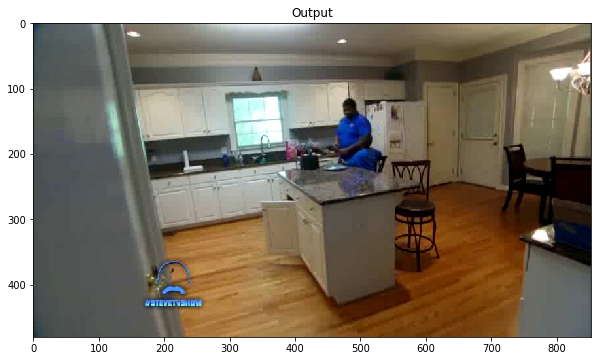

697
No face detected


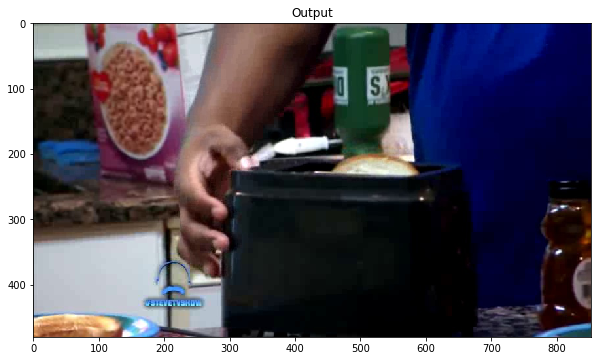

718


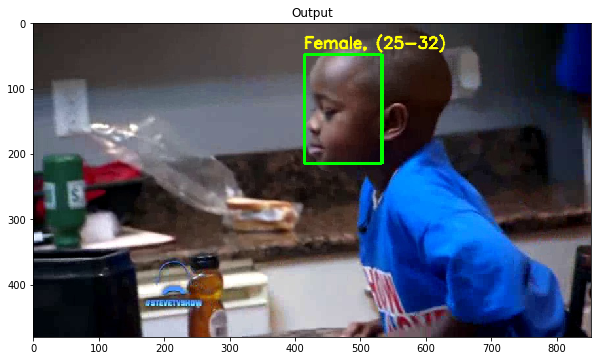

752
No face detected


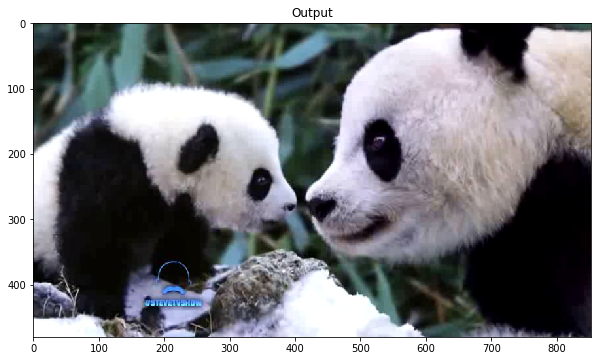

In [14]:
frame_number = [18,40,173,217,236,283,333,485,570,583,654,697,718,752]
for i in frame_number:
    print(i)
    img = cv2.imread('C:/Users/DMC/Desktop/frames_dest_folder/frame%d.jpg'%i)  

    resultImg,faceBoxes=highlightFace(faceNet,img)
    padding=20
    if not faceBoxes:
        print("No face detected")

    for faceBox in faceBoxes:
        face=img[max(0,faceBox[1]-padding):min(faceBox[3]+padding,img.shape[0]-1),max(0,faceBox[0]-padding)
                       :min(faceBox[2]+padding, img.shape[1]-1)]

        blob=cv2.dnn.blobFromImage(face, 1.0, (227,227), MODEL_MEAN_VALUES, swapRB=False)
        genderNet.setInput(blob)
        genderPreds=genderNet.forward()
        gender=genderList[genderPreds[0].argmax()]
        #print(f'Gender: {gender}')

        ageNet.setInput(blob)
        agePreds=ageNet.forward()
        age=ageList[agePreds[0].argmax()]
        #print(f'Age: {age[1:-1]} years')

        cv2.putText(resultImg, f'{gender}, {age}', (faceBox[0], faceBox[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,255), 2, cv2.LINE_AA)

    b,g,r = cv2.split(resultImg)
    plt.figure(figsize=(10,10))
    frame_rgb = cv2.merge((r,g,b))
    plt.imshow(frame_rgb)
    plt.title('Output') 
    plt.show()
    
    i+=1